In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 14.7 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
file = "/content/arm.png"

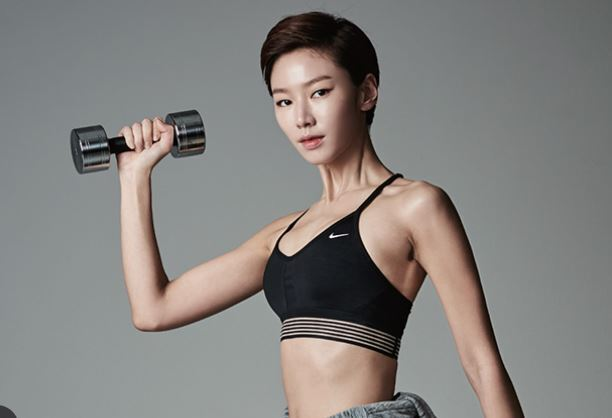

In [ ]:
img = cv2.imread(file)
cv2_imshow(img)
img.shape

img_angle = np.copy(img)

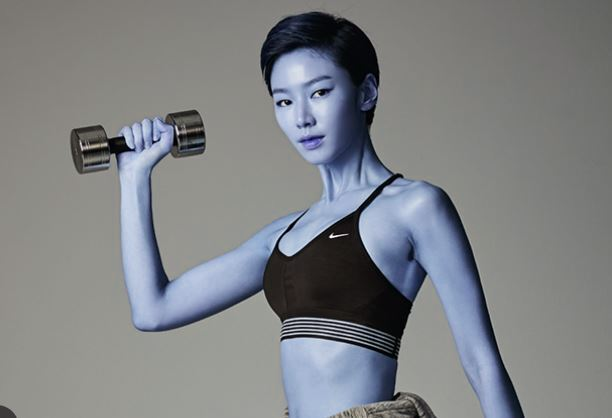

In [ ]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img_grey)

In [ ]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [ ]:
mp = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
# static_image_mode=True : 사진, static_image_mode=False : 동영상
# confidence : 신뢰도

In [ ]:
results = mp.process(img_grey)

In [ ]:
results.pose_landmarks.landmark[0]

x: 0.47811365127563477
y: 0.2746153473854065
z: -0.3819563090801239
visibility: 0.9999912977218628

In [ ]:
for landmark in results.pose_landmarks.landmark:
  print(landmark)

x: 0.47811365127563477
y: 0.2746153473854065
z: -0.3819563090801239
visibility: 0.9999912977218628

x: 0.49313533306121826
y: 0.2246156930923462
z: -0.39531204104423523
visibility: 0.9999810457229614

x: 0.5091954469680786
y: 0.2207922339439392
z: -0.3952728509902954
visibility: 0.9999797344207764

x: 0.5270147919654846
y: 0.21600238978862762
z: -0.39533162117004395
visibility: 0.9999847412109375

x: 0.4689413905143738
y: 0.23035436868667603
z: -0.3111766278743744
visibility: 0.9999815225601196

x: 0.46383363008499146
y: 0.23155778646469116
z: -0.3107697665691376
visibility: 0.9999758005142212

x: 0.4581928551197052
y: 0.23314470052719116
z: -0.3110072910785675
visibility: 0.9999825954437256

x: 0.5666938424110413
y: 0.2241172194480896
z: -0.3550669848918915
visibility: 0.9999862909317017

x: 0.47773313522338867
y: 0.2531422972679138
z: 0.03981668874621391
visibility: 0.9999759197235107

x: 0.5162192583084106
y: 0.3288407325744629
z: -0.3689967095851898
visibility: 0.9999915361404419



In [ ]:
landmarks = results.pose_landmarks

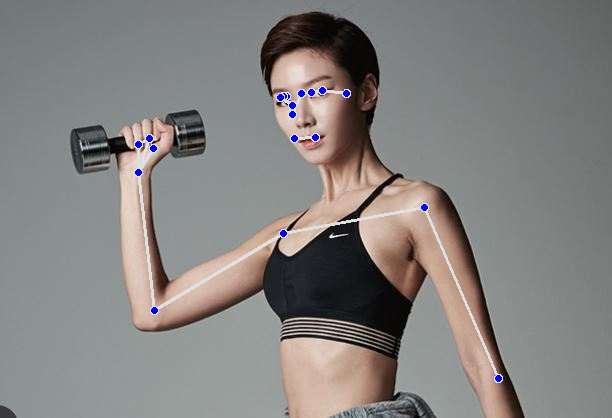

In [ ]:
mp_drawing.draw_landmarks(img, landmarks, mp_pose.POSE_CONNECTIONS, mp_drawing.DrawingSpec((255,0,0), 2, 2))
cv2_imshow(img)

In [ ]:
shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
print(shoulder.x, shoulder.y)
shoulder_x = int(img.shape[1] * shoulder.x)
shoulder_y = int(img.shape[0] * shoulder.y)
shoulder_pos = [shoulder_x, shoulder_y]
print(shoulder_pos)

0.46299225091934204 0.5582554340362549
[283, 233]


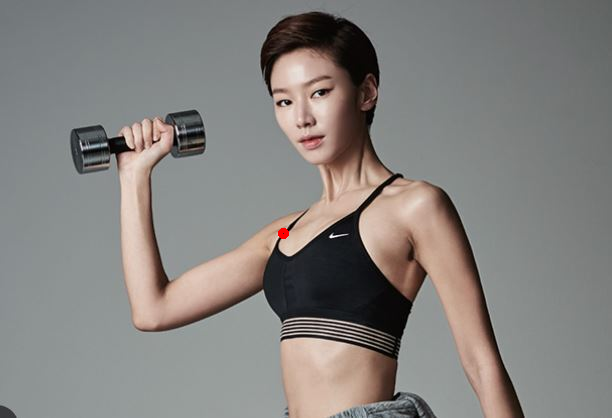

In [ ]:
cv2.circle(img_angle, (shoulder_x, shoulder_y), 3, (0,0,255), 3)
cv2_imshow(img_angle)

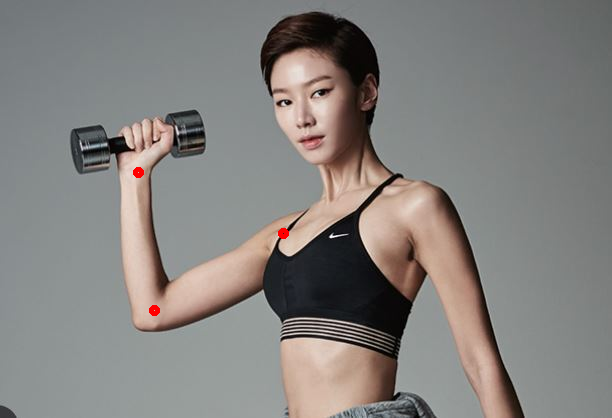

In [ ]:
wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
wrist_x = int(img.shape[1] * wrist.x)
wrist_y = int(img.shape[0] * wrist.y)
cv2.circle(img_angle, (wrist_x, wrist_y), 3, (0,0,255), 3, -1)

elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW]
elbow_x = int(img.shape[1] * elbow.x)
elbow_y = int(img.shape[0] * elbow.y)
cv2.circle(img_angle, (elbow_x, elbow_y), 3, (0,0,255), 3, -1)

cv2_imshow(img_angle)

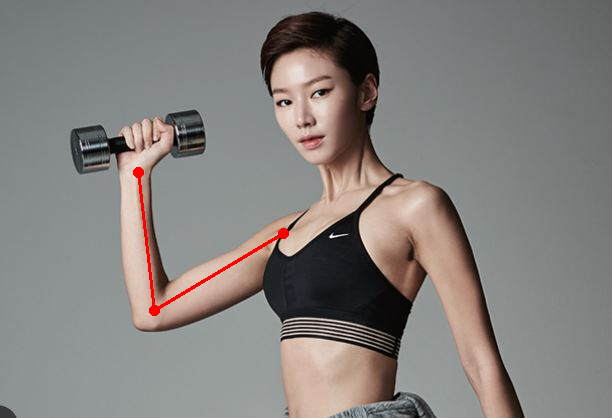

In [ ]:
cv2.line(img_angle, (wrist_x, wrist_y), (elbow_x, elbow_y), (0,0,255), 2)
cv2.line(img_angle, (shoulder_x, shoulder_y), (elbow_x, elbow_y), (0,0,255), 2)
cv2_imshow(img_angle)

In [ ]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle >180.0:
        angle = 360-angle

    return angle

In [ ]:
shoulder_pos = [shoulder_x, shoulder_y]
elbow_pos = [ elbow_x,  elbow_y]
wrist_pos = [wrist_x, wrist_y]

In [ ]:
img2 = np.copy(img_angle)
img3 = np.copy(img_angle)

65


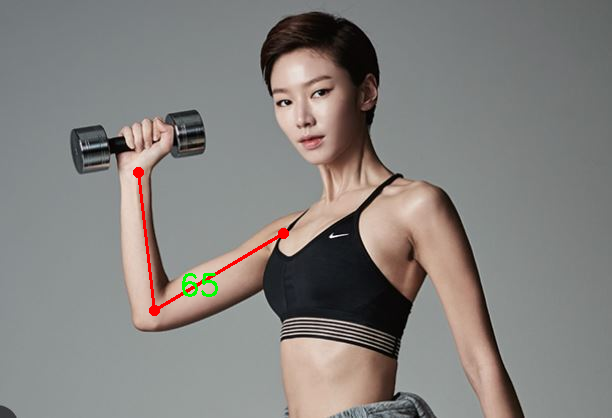

In [ ]:
angle = int(calculate_angle(shoulder_pos, elbow_pos,wrist_pos ))
print( angle)
cv2.putText(img_angle, str(angle), (elbow_x+25, elbow_y-15),  cv2.FONT_HERSHEY_SIMPLEX, 1,  (0, 255, 0),  2)

cv2_imshow(img_angle)